# CSC221 Web Scraping Wikipedia Group Project

### Author: <font color='red'> {Richard Brown} </font>

In [1]:
# How To Web Scrape Wikipedia 
# Using Python, Urllib, Beautiful Soup and Pandas

In [12]:
# INSERT CODE FOR STEPS 1-5

import ssl
# Import the library used to open URLs
import urllib.request
# Import the BeautifulSoup library so we can parse HTML and XML documents
from bs4 import BeautifulSoup
# Specify which URL/web page we are going to be scraping
#url='https://en.wikipedia.org/wiki/List_of_best-selling_books'
url='https://en.wikipedia.org/wiki/2012%E2%80%9313_North_Carolina_Tar_Heels_men%27s_basketball_team'
# Open the url using urllib.request and put the HTML into the page variable and
noCert = ssl.SSLContext()
#Certificate was giving me an issue so I removed the cert check -Larry
page = urllib.request.urlopen(url, context=noCert)
# Parse the HTML from the URL into the BeautifulSoup parse tree format
soup = BeautifulSoup(page, "lxml")
# Take a look at our underlying HTML (Display)
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   2012–13 North Carolina Tar Heels men's basketball team - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enable

In [13]:
# INSERT CODE FOR STEP 6

# Get the page 'title' and print it WITHOUT the <title> tags
soup.title.string

"2012–13 North Carolina Tar Heels men's basketball team - Wikipedia"

In [14]:
# CODE PROVIDED - THIS IS THE TABLE YOU WANT TO PARSE
# The table to parse is the Historical population table with with columns: 
#     Census, Pop and %+-
from IPython.display import Image
#Image("NC-Demographics-image1.jpg")

<div class="alert alert-block alert-info">
    <b>BROWSE the output</b> from the  <b>prettify</b> step or <b>view the source</b> in your browser so you can open a Find window to search for <b>table</b> tags <br><br>
    You will want to focus on HTML related to the table displayed above. Look/search for a <b>&lt;table ... &gt;</b> tag with the column headings for this table. <br>
    <ul>
    <li><b>&lt;table class="us-census-pop ..."&gt;</b></li>
    <li><b>&lt;caption&gt;Historical population&lt;/caption&gt;</b></li>
    </ul>
    <br>
    <b>NOTE:</b> When specifying <b>class</b> in the <b>find()</b> and <b>find_all()</b> commands, there is an <b>underscore</b> after the argument: <b>class_ = 'XXXXXXX'</b>
</div>

<span style="color:blue">
    <b>NOTE:</b> You can use the <b>find()</b> method instead of the <b>find_all()</b> method because there is <b>ONLY 1</b> table tag on this page <br><br>
    7. Use a <b>find(...)</b> command to get the 'table' tag with <b>class_="us-census-pop"</b> <br>
    8. Display the results using <b>.prettify()</b> 
</span>

In [15]:
# INSERT CODE FOR STEPS 7-8

# Use the 'find()' command to get the 'table' with class="us-census-pop"
# NOTE: There is ONLY 1 table match, so do NOT use 'find_all()'

# Display table so you can see your results - use .prettify() to make it easier to read


#wikitable_sortable = soup.find("table", class_="wikitable sortable")
wikitable_sortable = soup.find("table", class_="wikitable sortable")
# Print the type & length of all_tables
print(len(wikitable_sortable))
# Iterate thru all_tables and print each table entry
print(wikitable_sortable.prettify())
#for table in all_sortable_tables:
#    print ("Sortable Table: ", table, "\n") 

2
<table border="1" class="wikitable sortable">
 <tbody>
  <tr>
   <th>
    Name
   </th>
   <th>
    Number
   </th>
   <th>
    Pos.
   </th>
   <th>
    Height
   </th>
   <th>
    Weight
   </th>
   <th>
    Year
   </th>
   <th>
    Hometown
   </th>
   <th class="unsortable">
    Notes
   </th>
  </tr>
  <tr>
   <td>
    <a href="/wiki/Harrison_Barnes" title="Harrison Barnes">
     Harrison Barnes
    </a>
   </td>
   <td>
    40
   </td>
   <td>
    F
   </td>
   <td>
    6'8"
   </td>
   <td>
    210
   </td>
   <td>
    Sophomore
   </td>
   <td>
    <a href="/wiki/Ames,_Iowa" title="Ames, Iowa">
     Ames, Iowa
    </a>
   </td>
   <td>
    <a class="mw-redirect" href="/wiki/National_Basketball_Association_Draft" title="National Basketball Association Draft">
     NBA draft
    </a>
   </td>
  </tr>
  <tr>
   <td>
    <a href="/wiki/Kendall_Marshall" title="Kendall Marshall">
     Kendall Marshall
    </a>
   </td>
   <td>
    5
   </td>
   <td>
    G
   </td>
   <td>
    6'3

<span style="color:blue">
Now, start working thru the table tags to get the rows &amp; their associated column information.<br>
   
9. Use a <b>FOR-loop</b> to iterate thru the values returned by a <b>find_all('tr')</b><br>
    These will be the ROWS
10. Call <b>find_all('td')</b> on each <b>row</b> returned by Step 9 <br>
    These will be the COLUMNS
11. Print the number of cells/columns in each row (Use the <b>len(...)</b> method to do this)<br>
12. Use a <b>FOR-loop</b> to iterate thru the <b>cells</b> to see the contents of each <b>column</b><br> 
13. Print the value of each <b>column</b>
</span>

In [16]:
# INSERT CODE FOR STEPS 9-13

# Find & iterate thru all the table rows, then ...
# Find all the table cells, print the len() then iterate thru the cells printing each column
# Use find_all() to find all the <table ...> tags 
all_tables = wikitable_sortable.find_all("tr")
# Print the type & length of all_tables
#print(type(all_tables))
#print(len(all_tables))
# Iterate thru all_tables and print each table entry

for row in all_tables:
   
    cells=row.findAll('td')
    print(len(cells))
    for column in cells:
        print(column)



0
8
<td><a href="/wiki/Harrison_Barnes" title="Harrison Barnes">Harrison Barnes</a></td>
<td>40</td>
<td>F</td>
<td>6'8"</td>
<td>210</td>
<td>Sophomore</td>
<td><a href="/wiki/Ames,_Iowa" title="Ames, Iowa">Ames, Iowa</a></td>
<td><a class="mw-redirect" href="/wiki/National_Basketball_Association_Draft" title="National Basketball Association Draft">NBA draft</a>
</td>
8
<td><a href="/wiki/Kendall_Marshall" title="Kendall Marshall">Kendall Marshall</a></td>
<td>5</td>
<td>G</td>
<td>6'3"</td>
<td>186</td>
<td>Sophomore</td>
<td><a href="/wiki/Dumfries,_Virginia" title="Dumfries, Virginia">Dumfries, Virginia</a></td>
<td>NBA Draft
</td>
8
<td><a href="/wiki/John_Henson_(basketball)" title="John Henson (basketball)">John Henson</a></td>
<td>31</td>
<td>F</td>
<td>6'10"</td>
<td>210</td>
<td>Junior</td>
<td><a href="/wiki/Tampa,_Florida" title="Tampa, Florida">Tampa, Florida</a></td>
<td>NBA Draft
</td>
8
<td><a href="/wiki/Tyler_Zeller" title="Tyler Zeller">Tyler Zeller</a></td>
<td>44</

<div class="alert alert-block alert-warning">
<strong>***IMPORTANT***:</strong> LOOK AT THE TABLE INFORMATION PRINTED ABOVE!!!. <br><br>
    <b>A few things to notice: </b><br>
<ol>
<li>The length of the ROWS with the data we want (What is it?) </li>
<li>There seems to be an EMPTY column on each of these ROWS (How do you handle this?) </li>
<li>Where is the census DATE for each ROW??? (Look back at the original table source to find it)
</div>

<span style="color:blue">
    14. Create 3 lists: <b> A, B and C </b> for each column: <b>Census, Population and Percent</b>.<br>
    15. Copy the same <b>for-loop</b> used above to <b>find_all('tr')</b> tags for the <b>rows</b> [Step 9]<br>
    16. Copy the same <b>find_all('td')</b> used above to <b>find_all('td')</b> the <b>cells (columns)</b> [Step 10] <br>
    17. Check the <b>len()</b> to see if it is a row we want, then APPEND the correct <b>cells[<em>index</em>]</b> value <b>text</b> to the correct list (B or C)<br>
        - Refer back to the Tutorial code if you need help with this command <br>
    
<b>NOTICE:</b>Where is the Census Date??? - it is NOT in any of the cells<br>
    
Since this is bit tricky, I'm going to give you the code to get the Census Date.<br>
        
ADD within the Step 15 FOR-loop (you can put before or after the <b>find_all('td')</b> processing):
    

    # Find the table header in this row (if scope="row")
    head = rows.find('th', {"scope" : "row"})
    if head:
        A.append(head.a.text)
    
</span>

In [17]:
# INSERT CODE FOR STEPS 14-17

# Create 3 empty lists to hold the column data
A = []
B = []
C = []
D = []
E = []
F = []
G = []
H = []


# COPY CODE FROM STEPS 9 & 10 HERE 
# Find the table header in this row (if scope="row")
all_tables = wikitable_sortable.find_all("tr")
#
for row in all_tables:
    cells=row.findAll('td')
    #print(cells)
    if len(cells)== 8:
       head = row.find('td')
       if head:
            #print(cells[0],cells[1],cells[2],cells[3],cells[4],cells[5],cells[6],cells[7])
            #print(cells[7])
            A.append(cells[0].find(text=True))
            B.append(cells[1].find(text=True))
            C.append(cells[2].find(text=True))
            D.append(cells[3].find(text=True))
            E.append(cells[4].find(text=True))
            F.append(cells[5].find(text=True))
            G.append(cells[6].find(text=True))
            #H.append(cells[7].find(text=True))



<span style="color:blue">
    18. Import <strong>pandas</strong><br>
    19. Convert the lists into a <strong>DataFrame</strong> named <strong>df</strong> with the list vs. column heading correlation:<br>
        <ul>
        <li>A = 'Census'</li>
        <li>B = 'Population'</li>
        <li>C = 'Percent'</li>
        </ul>
    20. Display the DataFrame <strong>df</strong>
</span>

In [18]:
# INSERT CODE FOR STEPS 18-20

# Import Pandas library 
import pandas as pd
df=pd.DataFrame(A,columns=['Name'])
df['Number']= B
df['Position']= C
df['Height']= D
df['Weight']= E
df['Year']= F
df['Hometown']= G
#df['Notes']= H
df
# Create a DataFrame using column 'A' to start, then ...
# add each of the lists as a column in the DataFrame with the required column name



,Name,Number,Position,Height,Weight,Year,Hometown
0,Harrison Barnes,40,F,"6'8""",210,Sophomore,"Ames, Iowa"
1,Kendall Marshall,5,G,"6'3""",186,Sophomore,"Dumfries, Virginia"
2,John Henson,31,F,"6'10""",210,Junior,"Tampa, Florida"
3,Tyler Zeller,44,F,"7'0""",250,Senior,"Washington, Indiana"
4,Justin Watts,24,G,"6'4""",210,Senior,"Durham, North Carolina"
5,David Dupont,22,F,"6'5""",195,Senior,"Greensboro, North Carolina"
6,Patrick Crouch,30,G,"5'11""",175,Senior,Asheville
7,Stewart Cooper,34,F,"6'5""",205,Senior,"Winston-Salem, North Carolina"
8,Stilman White,11,G,"6'0""",170,Freshman,"Wilmington, North Carolina"


<div class="alert alert-block alert-info">
    <b>NOTE:</b> Your table should be complete. It should look very much like the <b>Historical Population</b> table image displayed at the start of PART B.</div>

## END OF PART B 

# PART B+ ... One More Step!!! (5 points)

Save the DataFrame __df__ to a CSV file 

- Use Panda's <b>.to_csv()</b> function to create file <b>NC_demographics.csv</b>
- Print a the message <b>File NC_demographics.csv created</b>

In [21]:
# INSERT "ONE MORE STEP" CODE HERE

# Save the DataFrame (df) to a CSV file named 'NC_demographics.csv' using Panda's to_csv() function
df.to_csv('UNC_2012Basketballteam.csv')
# Print file created message
print('File UNC_2012Basketballteam.csv created')

File UNC_2012Basketballteam.csv created


In [60]:
import os
from matplotlib import pyplot as plt
DF_UNC2012BT = pd.read_csv('UNC_2012Basketballteam.csv', usecols=['Name', 'Number', 'Position', 'Height', 'Weight', 'Year', 'Hometown'])
Height = DF_UNC2012BT.Height.tolist()
converted_height_list = []
for i in Height:
    converted_height = int(i[0])
    converted_height = converted_height * 12
    try:
        trash = i[4]
    except:
        inches = int(i[2])
    else:
        inches = int(i[2]) * 10 + int(i[3])
    converted_height_list.append(converted_height + inches)
print(converted_height_list)
chseries = pd.Series(data=converted_height_list)
DF_UNC2012BT['Height'] = chseries
DF_UNC2012BT


[80, 75, 82, 84, 76, 77, 71, 77, 72]


,Name,Number,Position,Height,Weight,Year,Hometown
0,Harrison Barnes,40,F,80,210,Sophomore,"Ames, Iowa"
1,Kendall Marshall,5,G,75,186,Sophomore,"Dumfries, Virginia"
2,John Henson,31,F,82,210,Junior,"Tampa, Florida"
3,Tyler Zeller,44,F,84,250,Senior,"Washington, Indiana"
4,Justin Watts,24,G,76,210,Senior,"Durham, North Carolina"
5,David Dupont,22,F,77,195,Senior,"Greensboro, North Carolina"
6,Patrick Crouch,30,G,71,175,Senior,Asheville
7,Stewart Cooper,34,F,77,205,Senior,"Winston-Salem, North Carolina"
8,Stilman White,11,G,72,170,Freshman,"Wilmington, North Carolina"


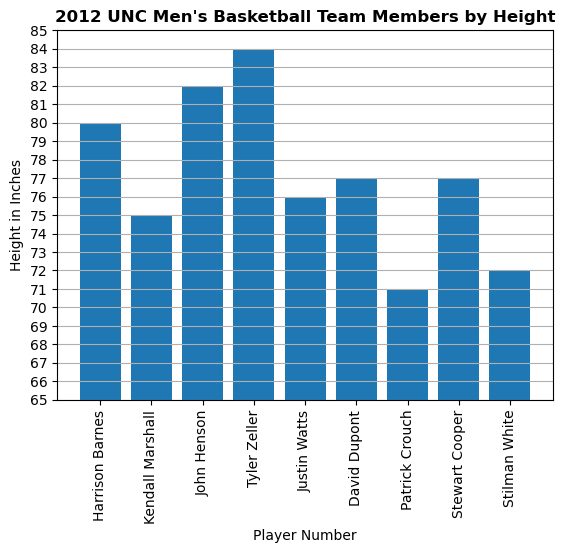

In [100]:
PLAYERS = DF_UNC2012BT.Name
HEIGHT = DF_UNC2012BT.Height
y_range = [x for x in range(60, 86)]
plt.title('2012 UNC Men\'s Basketball Team Members by Height', fontsize=12, weight='bold')
plt.bar(PLAYERS, HEIGHT)
plt.xticks(PLAYERS, rotation = 90)
plt.yticks(y_range)
plt.xlabel('Player Number')
plt.ylabel('Height in Inches')
plt.grid(axis = 'y')
plt.ylim(65, 85)
plt.show()

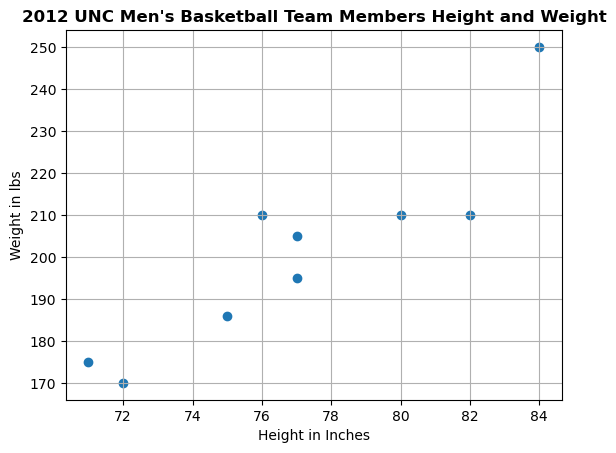

In [102]:
WEIGHT = DF_UNC2012BT.Weight
plt.scatter(HEIGHT, WEIGHT)
plt.title('2012 UNC Men\'s Basketball Team Members Height and Weight', fontsize=12, weight='bold')
plt.xlabel('Height in Inches')
plt.ylabel('Weight in lbs')
plt.grid()
plt.show()